# Dynamic Feature As Single Features

## Initialisation

In [4]:
import os

import numpy as np
import pandas as pd

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [5]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [6]:
# load in original ccle data
loading_code = 'generic-gdsc-1-FGFR_0939-LN_IC50-fgfr4_ccle_dynamic_features-true-Row'
# generic-gdsc-{number}-{drug_name}-{target_label}-{dataset_name}-{replace_index}-{row_index}
feature_data, label_data = data_link.get_data_using_code(loading_code)

In [7]:
loading_code = 'fgfr4_ccle_dynamic_features'
dynamic_features = data_link.get_data_from_code(loading_code)

In [8]:
# attempt load from loading code

loading_code = 'fgfr4_model_raw_simulation'
simulation_data = data_link.get_data_from_code(loading_code)

## Visualisation 

In [33]:
simulation_data

,Cellline,Time,pIGFR,pFGFR4,pERBB,pIRS,aPI3K,PIP3,pFRS2,aGrb2,...,pMEK,pERK,aGAB1,aGAB2,SPRY2,pSPRY2,PTP,aCbl,FOXO,amTORC2
0,ACH-001113,0,0.004584,133.063698,30.041304,0.008239,0.711660,0.026866,0.072482,1.762771,...,0.039595,434.690222,3.511815,5.665967e-11,1.286341,1.633151e-05,12.094080,4.013742,142.223071,0.035257
1,ACH-001113,60,0.006161,0.707059,39.850969,0.008820,0.032865,0.001236,0.000389,0.971944,...,0.001151,15.624283,0.113390,9.005249e-10,8.647812,5.886911e-07,8.997799,4.020537,171.210063,0.035257
2,ACH-001113,120,0.009543,0.978536,59.249121,0.009739,0.489603,0.018473,0.000537,1.444383,...,0.004874,64.992899,2.119397,3.140406e-10,15.677962,1.475912e-06,5.807274,4.030926,184.264175,0.035376
3,ACH-001113,180,0.011310,1.096258,68.814101,0.010853,0.672549,0.025385,0.000602,1.677192,...,0.004177,55.951646,3.238889,4.195981e-10,22.294951,2.351654e-06,4.898984,4.044253,178.354613,0.035659
4,ACH-001113,240,0.012745,1.181330,76.305021,0.012089,0.784335,0.029606,0.000649,1.859451,...,0.003584,48.188283,4.055861,5.370477e-10,28.509268,3.240881e-06,4.346681,4.059094,167.608802,0.036007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35095,ACH-000052,1200,0.049248,1.880391,138.650385,0.105497,16.697973,0.630293,0.000829,3.100799,...,0.000528,7.727831,27.141942,1.291626e-08,84.758057,1.231497e-05,0.770462,5.088860,9.824946,0.523766
35096,ACH-000052,1260,0.050298,1.876532,140.159651,0.110402,16.704313,0.630532,0.000828,3.134400,...,0.000517,7.566772,27.187355,1.332593e-08,86.538262,1.254786e-05,0.754276,5.125351,9.810677,0.528856
35097,ACH-000052,1320,0.051284,1.872069,141.548801,0.115091,16.710030,0.630748,0.000826,3.165321,...,0.000507,7.420166,27.228411,1.371511e-08,88.215995,1.276073e-05,0.739682,5.161324,9.796681,0.533944
35098,ACH-000052,1380,0.052211,1.867138,142.832245,0.119569,16.715218,0.630944,0.000824,3.193884,...,0.000497,7.286105,27.265736,1.408519e-08,89.799967,1.295566e-05,0.726451,5.196746,9.782923,0.539031


In [6]:
dynamic_features

,Row,pAkt_auc,pAkt_median,pAkt_tfc,pAkt_tmax,pAkt_max,pAkt_tmin,pAkt_min,pAkt_ttsv,pAkt_tsv,...,amTORC2_auc,amTORC2_median,amTORC2_tfc,amTORC2_tmax,amTORC2_max,amTORC2_tmin,amTORC2_min,amTORC2_ttsv,amTORC2_tsv,amTORC2_init
0,ACH-001113,0.019879,0.022585,5.339313,1.0,0.029060,0.04,0.004584,0.04,0.004584,...,0.038656,0.039956,0.334899,1,0.047065,0.08,0.035257,0.04,0.035257,0.035257
1,ACH-001289,0.047131,0.051773,9.378872,1.0,0.083667,0.04,0.008061,0.04,0.008061,...,0.000253,0.000261,0.144059,1,0.000289,0.04,0.000252,0.04,0.000252,0.000252
2,ACH-001339,0.107427,0.124875,11.832264,1.0,0.183883,0.04,0.014330,0.40,0.099500,...,0.756770,0.788399,0.280706,1,0.885227,0.04,0.691203,0.04,0.691203,0.691203
3,ACH-001538,0.018977,0.020471,6.192774,1.0,0.033563,0.04,0.004666,0.04,0.004666,...,0.028552,0.029323,0.815663,1,0.039862,0.04,0.021955,0.04,0.021955,0.021955
4,ACH-000242,0.019410,0.021032,4.682872,1.0,0.032885,0.04,0.005787,0.04,0.005787,...,0.001717,0.001599,5.486629,1,0.003834,0.04,0.000591,0.04,0.000591,0.000591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,ACH-000285,0.051886,0.059549,14.115679,1.0,0.092129,0.04,0.006095,0.04,0.006095,...,1.255967,1.308348,0.277441,1,1.468070,0.04,1.149228,1.00,1.468070,1.149228
1400,ACH-002669,0.019672,0.022874,8.579873,1.0,0.030418,0.04,0.003175,0.04,0.003175,...,0.002564,0.002408,3.713168,1,0.005368,0.04,0.001139,0.04,0.001139,0.001139
1401,ACH-001858,0.029551,0.033124,10.070813,1.0,0.051003,0.04,0.004607,0.04,0.004607,...,0.037795,0.039048,0.545008,1,0.049100,0.04,0.031780,0.04,0.031780,0.031780
1402,ACH-001997,0.056725,0.062795,12.479992,1.0,0.106207,0.04,0.007879,0.04,0.007879,...,0.256407,0.267035,0.297960,1,0.301974,0.04,0.232653,0.04,0.232653,0.232653


### Generate Data

In [11]:
target_proteins = ['pAkt']

indexed_dyn_feats = dynamic_features.set_index('Row')
columns = indexed_dyn_feats.columns

dyn_feat_cols = ['auc', 'median', 'tfc', 'tmax',
                 'max', 'tmin', 'min', 'ttsv', 'tsv', 'init']

joint_dyn_feat_data = []
joint_labels = []
joint_labels_id = []


# dataFrame['column name'].str.match('string')


dyn_feat_data = []
for protein in target_proteins:
    # filter data based on "protein_" in the column name
    filtered_cols = [col for col in columns if col.startswith(protein)]
    filtered_data = indexed_dyn_feats[filtered_cols]
    dyn_feat_data.append(filtered_data)

for i, data in enumerate(dyn_feat_data):
    label = target_proteins[i]
    label_id = i
    for row in range(data.shape[0]):
        data_row = data.iloc[row].tolist()
        # print(label,len(data_row))
        joint_dyn_feat_data.append(data_row)
        joint_labels.append(label)
        joint_labels_id.append(label_id)

joint_dyn_feat_df = pd.DataFrame(joint_dyn_feat_data, columns=dyn_feat_cols)


In [12]:
joint_dyn_feat_df

,auc,median,tfc,tmax,max,tmin,min,ttsv,tsv,init
0,0.019879,0.022585,5.339313,1.0,0.029060,0.04,0.004584,0.04,0.004584,0.004584
1,0.047131,0.051773,9.378872,1.0,0.083667,0.04,0.008061,0.04,0.008061,0.008061
2,0.107427,0.124875,11.832264,1.0,0.183883,0.04,0.014330,0.40,0.099500,0.014330
3,0.018977,0.020471,6.192774,1.0,0.033563,0.04,0.004666,0.04,0.004666,0.004666
4,0.019410,0.021032,4.682872,1.0,0.032885,0.04,0.005787,0.04,0.005787,0.005787
...,...,...,...,...,...,...,...,...,...,...
1399,0.051886,0.059549,14.115679,1.0,0.092129,0.04,0.006095,0.04,0.006095,0.006095
1400,0.019672,0.022874,8.579873,1.0,0.030418,0.04,0.003175,0.04,0.003175,0.003175
1401,0.029551,0.033124,10.070813,1.0,0.051003,0.04,0.004607,0.04,0.004607,0.004607
1402,0.056725,0.062795,12.479992,1.0,0.106207,0.04,0.007879,0.04,0.007879,0.007879


In [13]:
all_celllines = simulation_data['Cellline'].unique()
all_proteins = simulation_data.columns[2:]

protein_simulation_dynamics = []

for target in target_proteins:

    protein_df_data = []
    count = 0
    for cellline in all_celllines:
        for protein in all_proteins:
            if protein == target:
                cellline_protein_data = simulation_data[(simulation_data['Cellline'] == cellline)]
                protein_data = cellline_protein_data[protein]
                protein_df_data.append(protein_data.tolist())

    time_column_df = pd.DataFrame(protein_df_data, columns=cellline_protein_data['Time'])
    protein_simulation_dynamics.append(time_column_df)

In [19]:
print(len(protein_simulation_dynamics))

1


In [20]:
protein_simulation_dynamics[0].shape

(1404, 25)

In [18]:
protein_simulation_dynamics[0].head()

Time,0,60,120,180,240,300,360,420,480,540,...,900,960,1020,1080,1140,1200,1260,1320,1380,1440
0,5.692853,1.515733,4.342809,5.469497,6.159255,6.736439,7.201853,7.569843,7.863404,8.102042,...,8.942670,9.030716,9.110656,9.183834,9.251323,9.314000,9.372586,9.427645,9.479653,9.529036
1,0.028137,0.016674,0.019877,0.024310,0.029358,0.034602,0.039874,0.045152,0.050464,0.055841,...,0.090485,0.096755,0.103187,0.109792,0.116574,0.123542,0.130705,0.138071,0.145648,0.153445
2,166.601936,166.733719,167.310165,167.815924,168.196995,168.485821,168.716404,168.911674,169.085510,169.246067,...,170.099642,170.234049,170.367352,170.499725,170.631304,170.762190,170.892464,171.022193,171.151428,171.280213
3,5.528354,4.377614,7.088716,9.352512,10.955719,12.083766,12.905543,13.529500,14.021434,14.421401,...,15.858625,16.012741,16.153017,16.281687,16.400468,16.510682,16.613441,16.709648,16.800227,16.885705
4,0.117100,0.098960,0.168035,0.485876,1.354962,2.180936,2.804173,3.281461,3.660668,3.971500,...,5.104410,5.225886,5.336080,5.436648,5.528909,5.613940,5.692647,5.765779,5.834000,5.897808


### Visualise One Protein at One row

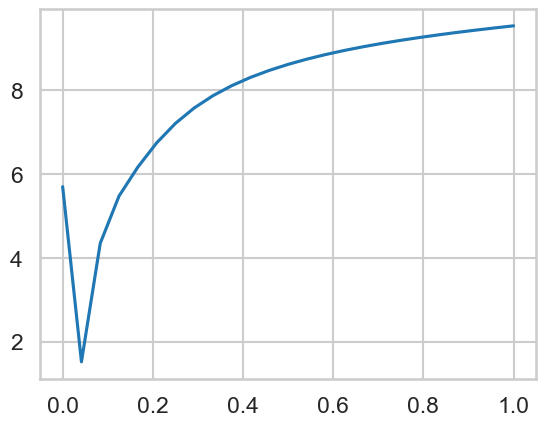

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# set context and style
sns.set_style("whitegrid")
sns.set_context("talk")

# plot the second row of the protein_simulation_dynamics[0]

row = 0
protein = target_proteins[0]
time = np.linspace(0,1,protein_simulation_dynamics[0].shape[1])
data = protein_simulation_dynamics[0].iloc[row]

plt.plot(time, data)

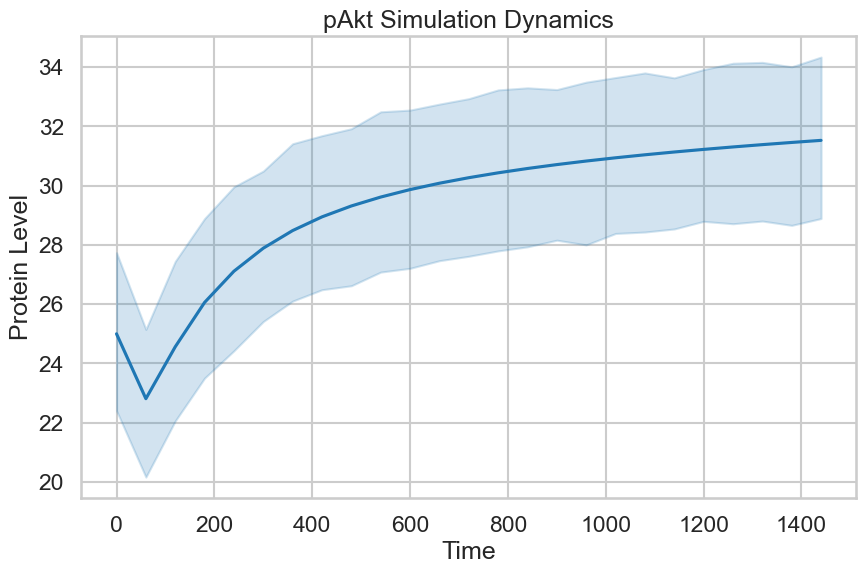

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=simulation_data, x='Time', y=target_proteins[0])
plt.xlabel('Time')
plt.ylabel('Protein Level')
plt.title(f'{protein} Simulation Dynamics')
plt.show()

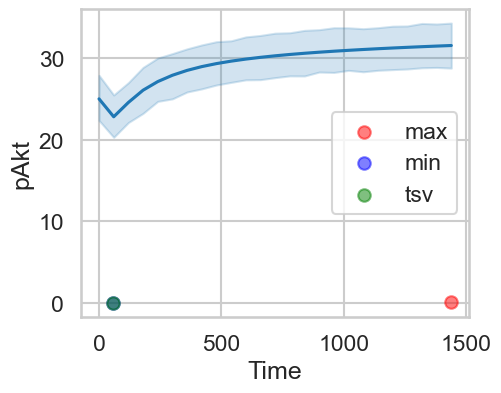

In [37]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# set context and style
sns.set_style("whitegrid")
sns.set_context("talk")

# plot joint_dyn_feat_df, plot (tmax, max), (tmin, min) and (ttsv, tsv) as time points 
row = 10
plt.figure(figsize=(5, 4))
# scatter only row 
plt.scatter(joint_dyn_feat_df.iloc[row]['tmax']*1440, joint_dyn_feat_df.iloc[row]['max'], color='red', label='max', alpha=0.5)
plt.scatter(joint_dyn_feat_df.iloc[row]['tmin']*1440, joint_dyn_feat_df.iloc[row]['min'], color='blue', label='min', alpha=0.5)
plt.scatter(joint_dyn_feat_df.iloc[row]['ttsv']*1440, joint_dyn_feat_df.iloc[row]['tsv'], color='green', label='tsv', alpha=0.5)

sns.lineplot(data=simulation_data, x='Time', y=target_proteins[0])
# create legend for coloured figures 
plt.legend()

### Visualise One Protein at All Rows 

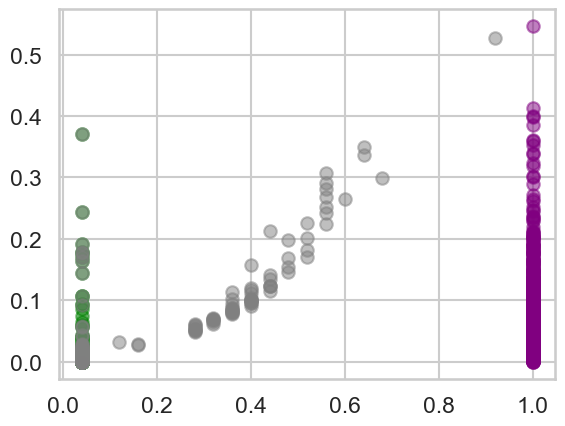

In [39]:
plt.scatter(joint_dyn_feat_df['tmax'], joint_dyn_feat_df['max'],color='purple', label='max', alpha=0.5)
plt.scatter(joint_dyn_feat_df['tmin'], joint_dyn_feat_df['min'], color='green', label='min', alpha=0.5)
plt.scatter(joint_dyn_feat_df['ttsv'], joint_dyn_feat_df['tsv'], color='grey', label='tsv', alpha=0.5)
# sns.lineplot(data=simulation_data, x='Time', y=target_proteins[0])
# plt.legend()

### Visualise all proteins at all rows

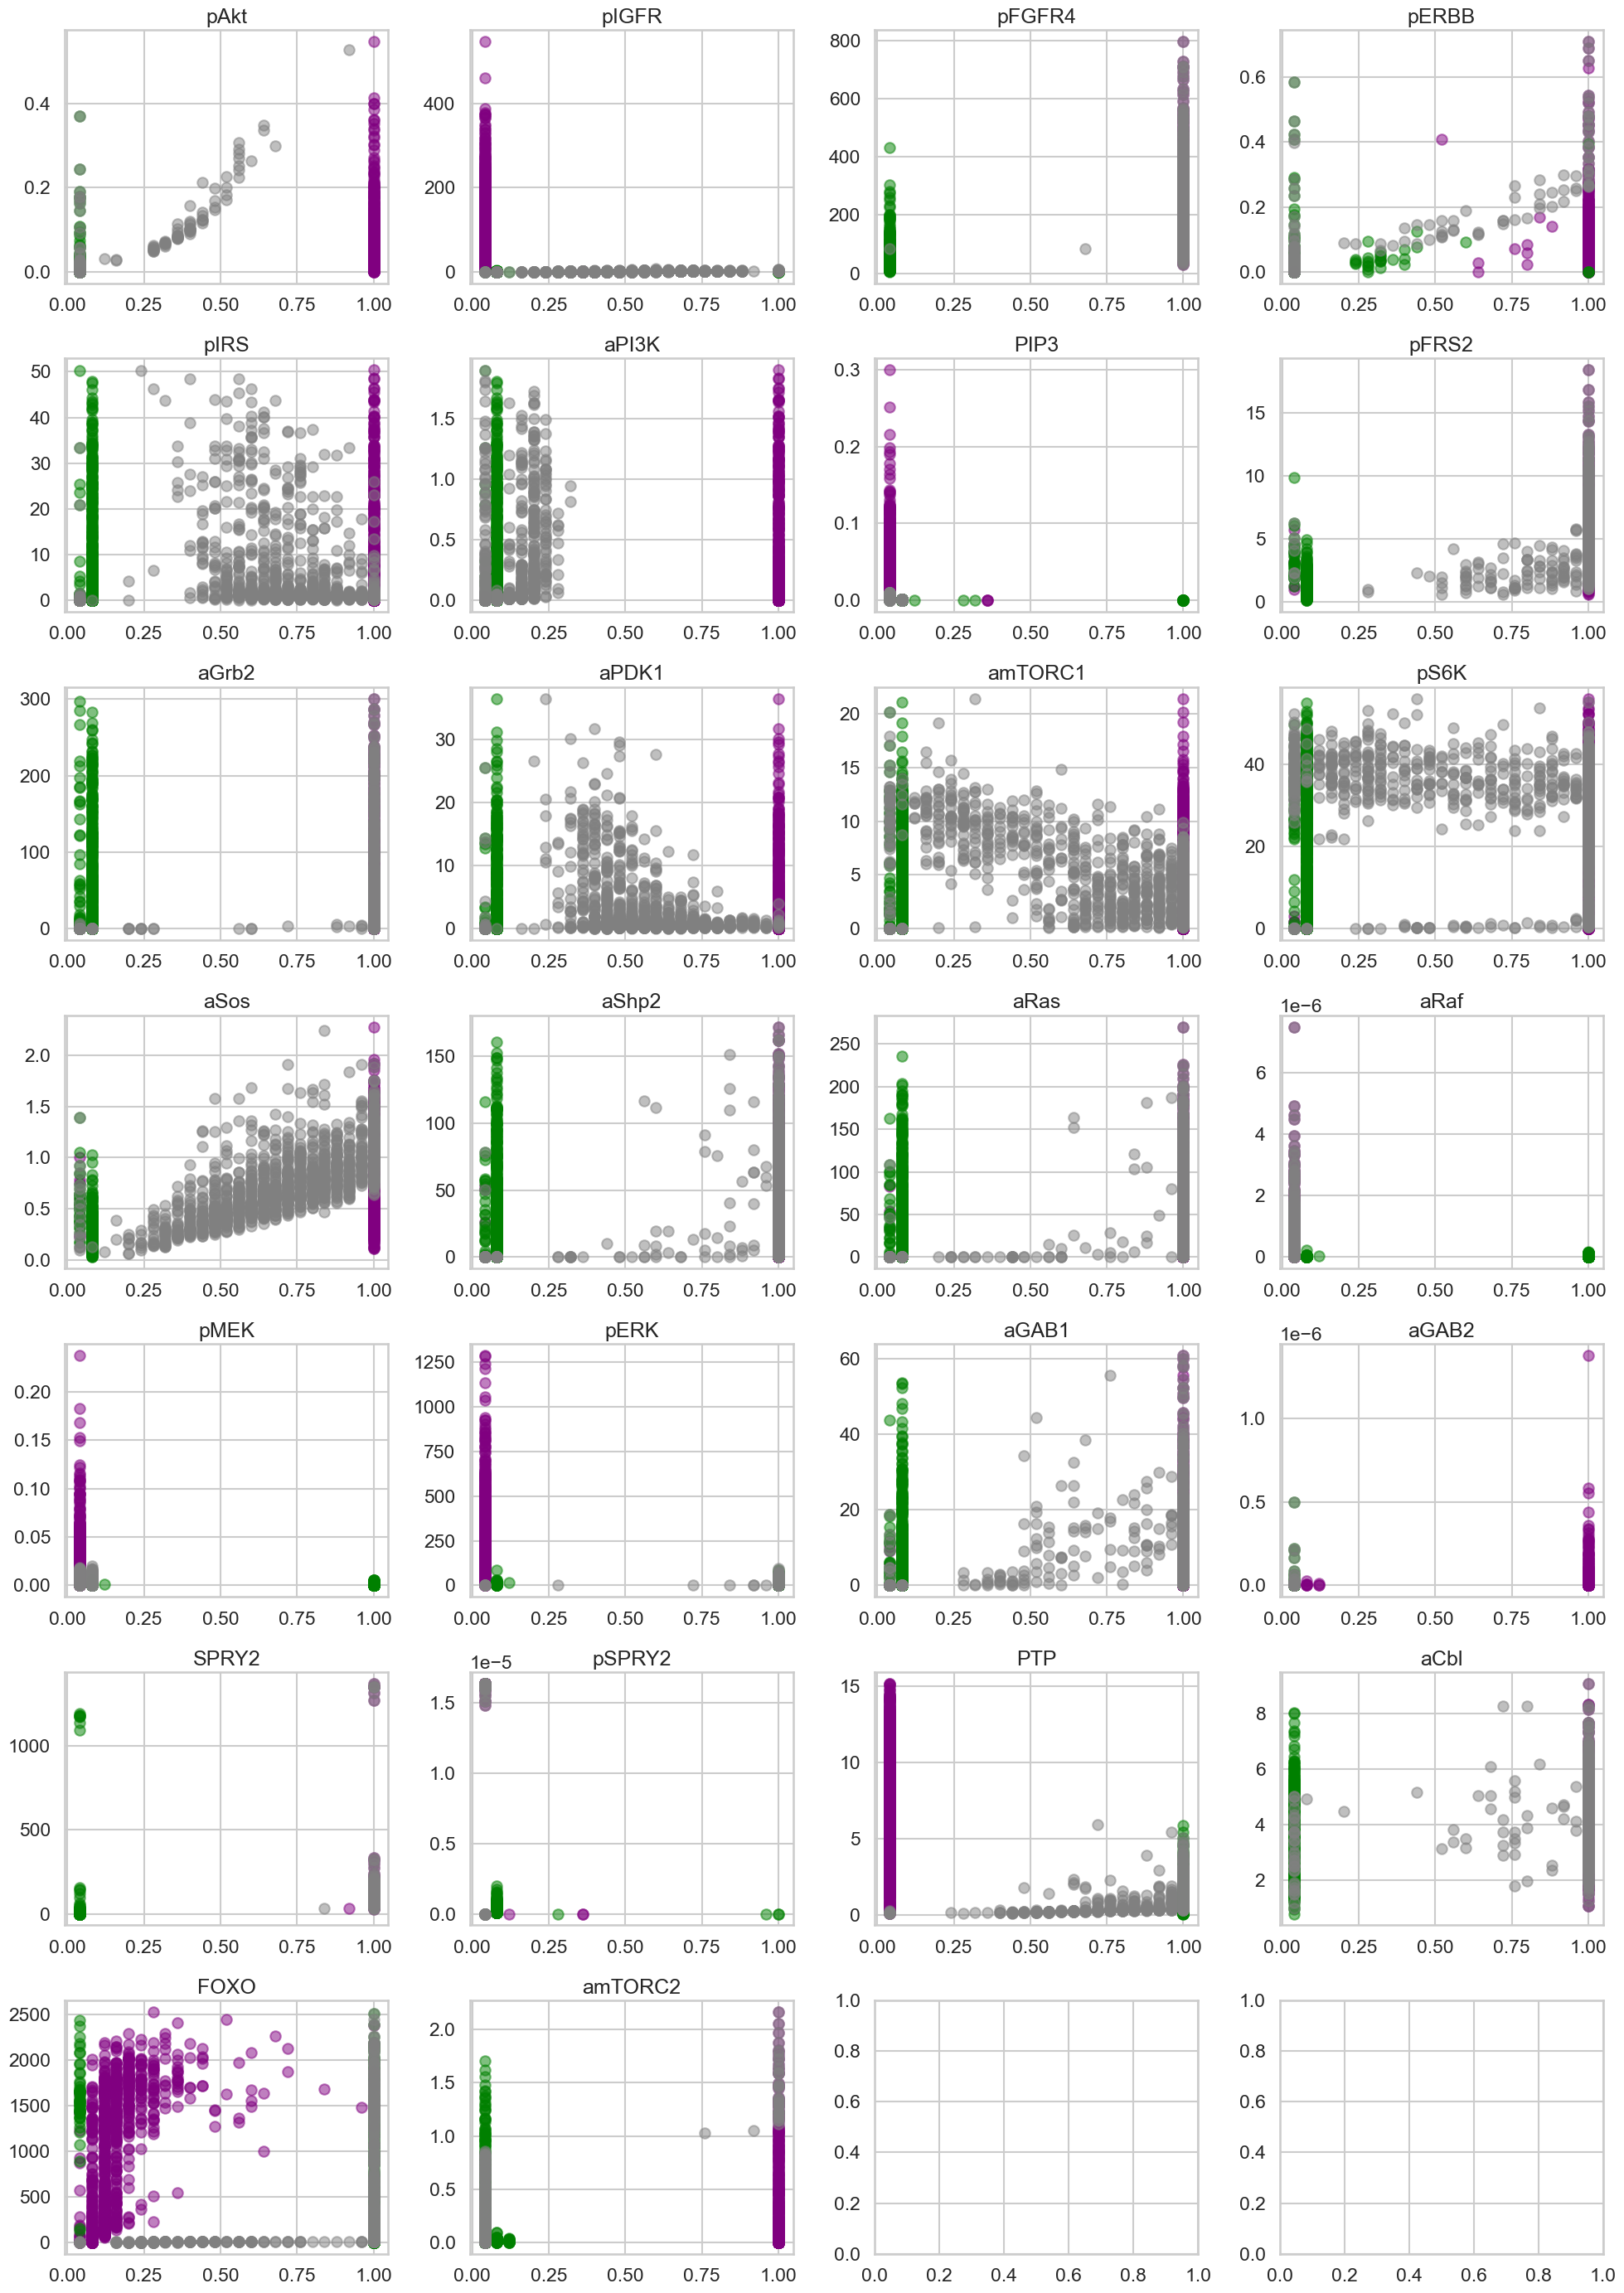

In [34]:
all_proteins = [
    'pAkt', 'pIGFR', 'pFGFR4', 'pERBB', 'pIRS', 'aPI3K', 'PIP3', 'pFRS2',
    'aGrb2', 'aPDK1', 'amTORC1', 'pS6K', 'aSos', 'aShp2', 'aRas', 'aRaf',
    'pMEK', 'pERK', 'aGAB1', 'aGAB2', 'SPRY2', 'pSPRY2', 'PTP', 'aCbl',
    'FOXO', 'amTORC2'
]

def get_protein_dataset(protein: str, dynamic_features):
    
    target_proteins = [protein] 
    indexed_dyn_feats = dynamic_features.set_index('Row')
    columns = indexed_dyn_feats.columns

    dyn_feat_cols = ['auc', 'median', 'tfc', 'tmax',
                    'max', 'tmin', 'min', 'ttsv', 'tsv', 'init']

    joint_dyn_feat_data = []
    joint_labels = []
    joint_labels_id = []

    dyn_feat_data = []
    for protein in target_proteins:
        # filter data based on "protein_" in the column name
        filtered_cols = [col for col in columns if col.startswith(protein)]
        filtered_data = indexed_dyn_feats[filtered_cols]
        dyn_feat_data.append(filtered_data)

    for i, data in enumerate(dyn_feat_data):
        label = target_proteins[i]
        label_id = i
        for row in range(data.shape[0]):
            data_row = data.iloc[row].tolist()
            # print(label,len(data_row))
            joint_dyn_feat_data.append(data_row)
            joint_labels.append(label)
            joint_labels_id.append(label_id)

    joint_dyn_feat_df = pd.DataFrame(joint_dyn_feat_data, columns=dyn_feat_cols)
    return joint_dyn_feat_df

# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# set context and style
sns.set_style("whitegrid")
sns.set_context("talk")

import math 

plot_cols = 4
plot_rows = math.ceil(len(all_proteins)/plot_cols)
plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))

for i, p in enumerate(all_proteins):
    plt.subplot(plot_rows, plot_cols, i+1)
    df = get_protein_dataset(p, dynamic_features)
    plt.scatter(df['tmax'], df['max'], color='purple', label='max', alpha=0.5)
    plt.scatter(df['tmin'], df['min'], color='green', label='min', alpha=0.5)
    plt.scatter(df['ttsv'], df['tsv'], color='grey', label='tsv', alpha=0.5)
    plt.title(p)
    
plt.tight_layout()
plt.show()


## Heatmap

[Text(0.5, 82.44444444444443, 'Dynamic Features (n=260)'),
 Text(119.44444444444444, 0.5, 'Cell Lines (n=1405)'),
 Text(0.5, 1.0, 'Heatmap of Dynamic Features for the FGFR4 Model')]

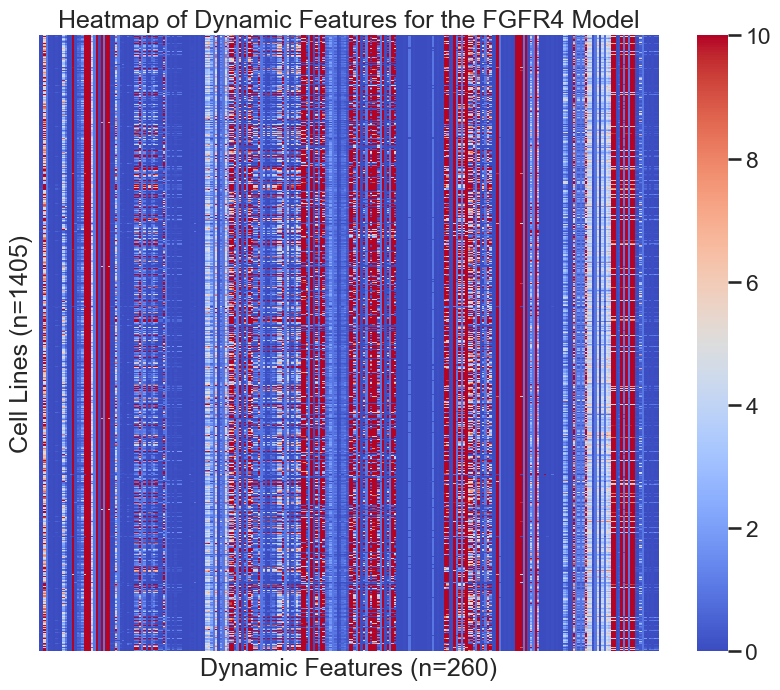

In [61]:
# visualise dynamic features as a heatmap

all_proteins = [
    'pAkt', 'pIGFR', 'pFGFR4', 'pERBB', 'pIRS', 'aPI3K', 'PIP3', 'pFRS2',
    'aGrb2', 'aPDK1', 'amTORC1', 'pS6K', 'aSos', 'aShp2', 'aRas', 'aRaf',
    'pMEK', 'pERK', 'aGAB1', 'aGAB2', 'SPRY2', 'pSPRY2', 'PTP', 'aCbl',
    'FOXO', 'amTORC2'
] 


# import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns


# set context and style

sns.set_style("whitegrid")

sns.set_context("talk")


# ValueError: could not convert string to float: 'ACH-001113'

# preprocess dynamic features further 


plt.figure(figsize=(10, 8))


dynamic_features_rowless = dynamic_features.drop(columns=['Row'])

# generate heatmap, with no xticks and yticks, but ylabels and xlabels apply
s = sns.heatmap(dynamic_features_rowless, 
            xticklabels=False, yticklabels=False,
            cmap='coolwarm', vmax=10, vmin=0)
s.set(xlabel='Dynamic Features (n=260)', 
      ylabel='Cell Lines (n=1405)', 
      title='Heatmap of Dynamic Features for the FGFR4 Model')